# Problem Set 1 - Erick Watt-Udogu

This project includes application data for students who applied to graduate programs in Rutgers-Camden's Graduate School of Arts and Sciences for the following terms: summer 2022, fall 2022 and spring 2023. The final aim of the project for the semester is to identify the key characteristics of applicants and matriculating students and tell the story of who applies to Rutgers Camden graduate programs and if there are strong correlates with matriculation.

In the long term, I am interested in answering the following question: 

*   Is there a reliable model for determining the relationship between matriculation and demographic variables, e.g. postal code; education vriables, e.g. GPA; and institutional decision variables, e.g. scholarship amount? 

In the short term, I am interested in some of the following questions:

*   How far before the semester begins do students generally apply?
*   Are there feeder universities? 
* Are there feeder programs?
* Are there dramatic differences in the demographics of applicants by program?

In this problem set, I endeavored to learn general information about applicants, so I isolated variables related to: "Age", "Gender", and "Race." 




In [1]:
import os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np
from statistics import *

import pylab as plt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)


import urllib  #weird, guess need to have os and pandas imported for this to work                                                  
                                                                          
import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

#! pip install geocoder #]later maybe
! pip install geopandas #this is how you install packages on colab
import geopandas as gpd                                                                                       
#from geopy.geocoders import Nominatim #later maybe

import seaborn as sns

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.8 MB/s eta 0:00:00


In [6]:
#download file from online and save in colab as ex1.csv
#no it breaks!
#need raw data link, eg:
#https://raw.githubusercontent.com/ewattudo/vis1/main/appdata.csv
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/appdata.csv", "appdata.csv")

('appdata.csv', <http.client.HTTPMessage at 0x7f26275d94c0>)

In [7]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'appdata.csv', 'sample_data']

In [8]:
dat=pd.read_csv('appdata.csv')

In [9]:
dat.columns

Index(['ID ', 'Degree Type', 'Final Recommended Decision', 'Admit-Coming',
       'Application Created Date', 'Days Before the Beginning of Semester ',
       'Domestic or INTL Applicant', 'Reporting Term', 'Age When Applied',
       'Mailing Zip/Postal Code', 'Mailing State/Province', 'Mailing Country',
       'Most Recent Educational Institution: Account Name', 'Gender', 'Race',
       'Program Selection: Program Selection Name', 'Admissions Status'],
      dtype='object')

In [10]:
dat.head(2)

,ID,Degree Type,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Domestic or INTL Applicant,Reporting Term,Age When Applied,Mailing Zip/Postal Code,Mailing State/Province,Mailing Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status
0,1,"Master's (e.g. MA, MS, EdM, MFA)",NaN,0,12/7/2021,273,International,Fall 2022,23.0,56407,Pradesh 2,Nepal,Vellore Institute Of Technolog,Male,Asian,Biology: Computational and Integrative (MS),Started App
1,2,"Master's (e.g. MA, MS, EdM, MFA)",NaN,0,1/2/2022,247,International,Fall 2022,21.0,380058,Gujarat,India,Ahmedabad University,Female,Asian,Biology: Computational and Integrative (MS),Started App


# Age Analysis

In [11]:
dat["Age When Applied"].mean()


28.10944625407166

In [12]:
dat['Age When Applied'].median()

25.0

In [ ]:
dat['Age When Applied'].mode()

0    23.0
dtype: float64

In [ ]:
dat['Age When Applied'].value_counts()

23.0    197
22.0    183
24.0    160
25.0    149
26.0    109
27.0     90
30.0     66
28.0     65
21.0     60
29.0     55
31.0     43
33.0     40
34.0     33
32.0     30
35.0     28
37.0     22
41.0     18
38.0     17
39.0     15
36.0     15
43.0     15
40.0     15
54.0     10
42.0     10
19.0     10
18.0      9
20.0      6
49.0      6
47.0      6
52.0      5
46.0      5
51.0      5
45.0      4
50.0      4
55.0      4
48.0      4
57.0      3
56.0      3
53.0      2
58.0      2
44.0      2
61.0      2
60.0      2
64.0      1
71.0      1
67.0      1
65.0      1
59.0      1
62.0      1
Name: Age When Applied, dtype: int64

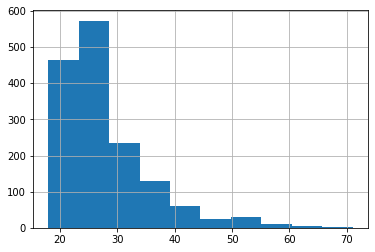

In [ ]:
dat['Age When Applied'].hist()

In [ ]:
pd.crosstab(dat["Age When Applied"], dat["Admit-Coming"])

Admit-Coming,0,1
Age When Applied,,
18.0,9,0
19.0,10,0
20.0,6,0
21.0,45,15
22.0,145,38
23.0,151,46
24.0,129,31
25.0,125,24
26.0,91,18


In [ ]:
pd.crosstab(dat["Admit-Coming"], dat["Age When Applied"] )

Age When Applied,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,57.0,58.0,59.0,60.0,61.0,62.0,64.0,65.0,67.0,71.0
Admit-Coming,,,,,,,,,,,,,,,,,,,,,
0,9,10,6,45,145,151,129,125,91,71,...,2,1,1,1,1,0,1,1,1,1
1,0,0,0,15,38,46,31,24,18,19,...,1,1,0,1,1,1,0,0,0,0


In this section, I ran some analysis of age data. What I found was that the distribution of student ages was right skewed around mid-20. The histogram was a helpful tool to decipher the differences between the variable's mean, median and mode. 

I began to do some work to help determine the difference between application and matriculation.

# *Gender Analysis*

In [ ]:
dat['Gender'].value_counts()

Female    852
Male      686
Name: Gender, dtype: int64

In [ ]:
pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 32.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

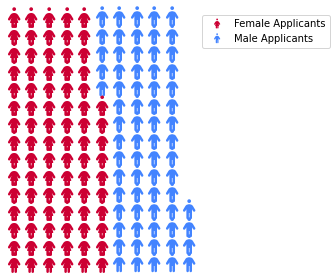

In [ ]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=15,
    values=[85.2, 68.6],
    colors=["#cc0033", "#4384FF"],
    icons=['person-dress', 'person'],
    font_size=20,
    icon_style='solid',
    icon_legend=True,
    legend={
        'labels': ['Female Applicants', 'Male Applicants'], 
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1)
    }
)

Applicants were overwhelmingly female. This is not surprising considering national trends. It is somewhat surprising considering the number of STEM programs in the school. A question I will look at in the future is the relationship between program and gender. 

# Race Analysis

In [ ]:
dat['Race'].value_counts()

Asian                                                                 531
White                                                                 471
Black or African American                                             302
Hispanic or Latino                                                     73
Hispanic or Latino; White                                              16
Asian; White                                                           14
Black or African American; Hispanic or Latino                           9
Black or African American; White                                        5
American Indian or Alaska Native; Black or African American             4
Asian; Black or African American                                        2
White; Other,White                                                      2
Asian; White; White,Asian                                               1
Other                                                                   1
Asian; Hispanic or Latino             

In [ ]:
dat['Race'].value_counts()[0:4]

Asian                        531
White                        471
Black or African American    302
Hispanic or Latino            73
Name: Race, dtype: int64

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import squarify 

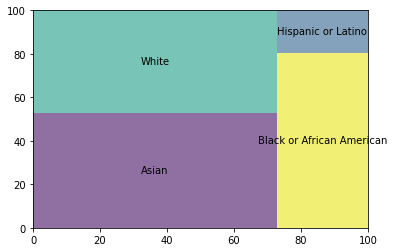

In [ ]:
import matplotlib.pyplot as plt
import squarify 
sizes=[531, 471, 302, 73]
label=["Asian", "White", "Black or African American", "Hispanic or Latino"]
squarify.plot(sizes=sizes, label=label, alpha=0.6 )
plt.show()

Interestingly, the race of an overwhelming number of graduate applicants is Asian. In future projects, I plan to look at this data by program and matriculation. 